# AI-CORE
### Post inference metrics calculation script

In [27]:
import os
from osgeo import gdal_array as ga
from sklearn import metrics
import rasterio
import matplotlib.pyplot as plt

#### Settings 

In [93]:
DS_NAME = '20190820_164143_0f21'
DIR_GT = 'data'
DIR_PREDICTED = 'inference'

#### File setup

In [94]:
gt_file = os.path.join(DIR_GT, DS_NAME, f'{DS_NAME}_mask.tif')
inf_file_class = os.path.join(DIR_PREDICTED, DS_NAME, 'pred_binarized.tif')
inf_file_proba = os.path.join(DIR_PREDICTED, DS_NAME, 'pred_probability.tif')
for p in [gt_file,inf_file_class,inf_file_proba]: 
    print(os.path.exists(p))

True
True
True


#### Load data 

In [95]:
gt = ga.LoadFile(gt_file)
pval = ga.LoadFile(inf_file_proba)

In [96]:
with rasterio.open(inf_file_class) as src:
    mask = src.dataset_mask() == 255
    cl = src.read()[0]

#### Analysis

In [97]:
print(metrics.classification_report(gt[mask], cl[mask]))
print("ROC-AUC score:", metrics.roc_auc_score(gt[mask], pval[mask]))
print("Fbeta score:", metrics.fbeta_score(gt[mask], cl[mask], beta=2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   7643795
           1       0.15      0.14      0.15     86577

    accuracy                           0.98   7730372
   macro avg       0.57      0.57      0.57   7730372
weighted avg       0.98      0.98      0.98   7730372

ROC-AUC score: 0.8543476544049038
Fbeta score: 0.14283966477029425


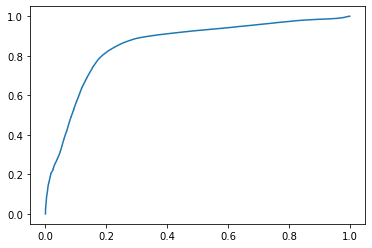

In [98]:
roc_curve = metrics.roc_curve(gt[mask], pval[mask])
plt.plot(roc_curve[0], roc_curve[1])
plt.plot([0,0], [1,1], 'k--')
plt.show()